качаем библиотеки

In [1]:
import pandas as pd
import numpy as np

import statistics
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats

# Проект


Наша кампания ранне имела всего один продукт, он был запущен давно. У нас есть записи сколько выручки нам приносил этот продукт за каждый день его работы. Пару месяцев назад кампания запустила второй продукт, и так же ежедневно фиксировала выручку которую он нам приносил. Данные по выручкам сохранены ниже в переменных product1 и product2.<br>
Наша задача сделать полный анализ на основе всего лишь этих двух списках.

In [2]:
### для загрузки данных
with open(r'project.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 0:
            product1 = [int(i) for i in line.split(' ')]
        if i == 1:
            product2 = [int(i) for i in line.split(' ')]

fp.close()

## **Задача 1**

<br>
подсчитайте среднее арифметическое (mean), медиану и моду для обоих списков: product1 и product2

In [3]:
# Средня арифметическая (mean)
mean_product1 = statistics.mean(product1)
mean_product2 = statistics.mean(product2)

# Медиана
median_product1 = statistics.median(product1)
median_product2 = statistics.median(product2)

# Мода
mode_product1 = statistics.mode(product1)
mode_product2 = statistics.mode(product2)

# Результаты
print(f"Mean (product1): {mean_product1}")
print(f"Mean (product2): {mean_product2}")
print(f"Median (product1): {median_product1}")
print(f"Median (product2): {median_product2}")
print(f"Mode (product1): {mode_product1}")
print(f"Mode (product2): {mode_product2}")

Mean (product1): 199.103
Mean (product2): 193.5
Median (product1): 198.5
Median (product2): 194.5
Mode (product1): 186
Mode (product2): 227


Какая из трех метрик будет наименее показательной, и почему?<br>
На основе оставшихся двух метрик какой продукт в среднем приносит больше выручки?

> Мода является наименее показательной метрикой. Она отображает значение, которое встречается чаще всего. Следовательно, эта метрика зависима от частоты значений.

> Так как среднее арифметическое и медиана для product1 выше, чем для product2, то следует, что product1 в среднем приносит больше выручки.



## **Задача 2**

<br>
подсчитайте стандартное отклонение и скажите оценка какого продукта является более точной?

In [4]:
# Стандартное отклонение
std_dev_product1 = statistics.stdev(product1)
std_dev_product2 = statistics.stdev(product2)

# Результаты
print(f"Стандартное отклонение (product1): {std_dev_product1:.2f}")
print(f"Стандартное отклонение (product2): {std_dev_product2:.2f}")

Стандартное отклонение (product1): 28.81
Стандартное отклонение (product2): 29.74




> Так как стандартное отклонение для product1 меньше, чем для product2, то оценки для product1 являются более точными.



## **Задача 3**

<br>
Нарисуйте распределение вероятности выручки для продукта1 и для продукта2.<br>
Можете использовать гистограмму или kdeplot

In [5]:
# Проверка длины массивов и дополнение до одинаковой длины
if len(product1) != len(product2):
    max_length = max(len(product1), len(product2))
    product1.extend([np.nan] * (max_length - len(product1)))
    product2.extend([np.nan] * (max_length - len(product2)))

# Создание DataFrame для данных
data = pd.DataFrame({'Product1': product1, 'Product2': product2})

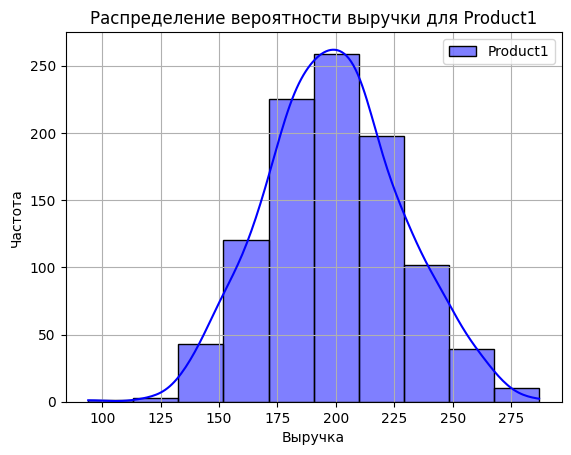

In [6]:
# Построение гистограммы и kdeplot для Product1
sns.histplot(data['Product1'].dropna(), kde=True, color='blue', label='Product1', bins=10)
plt.title('Распределение вероятности выручки для Product1')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

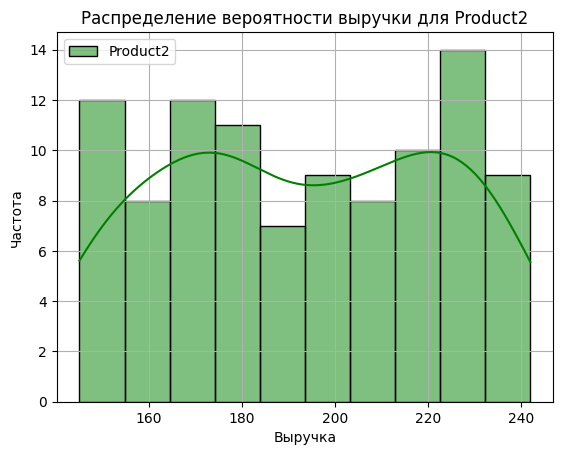

In [7]:
# Построение гистограммы и kdeplot для Product2
sns.histplot(data['Product2'].dropna(), kde=True, color='green', label='Product2', bins=10)
plt.title('Распределение вероятности выручки для Product2')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

## **Задача 4**

<br>
Посчитайте размах выручки для продукта1 и для продукта2<br>
Сходится ли разница в размахах и разница в стандартных отклонениях, какая может быть причина?

In [8]:
# Размах
range_product1 = max(product1) - min(product1)
range_product2 = max(product2) - min(product2)

# Результаты
print(f"Размах выручки (product1): {range_product1}")
print(f"Размах выручки (product2): {range_product2}")

print(f"Стандартное отклонение (product1): {std_dev_product1:.2f}")
print(f"Стандартное отклонение (product2): {std_dev_product2:.2f}")

Размах выручки (product1): 193
Размах выручки (product2): 97
Стандартное отклонение (product1): 28.81
Стандартное отклонение (product2): 29.74


> **Размах** отражает экстремальные значения и чувствителен к выбросам. У product1 он больше, что указывает на наличие резких пиков или провалов в выручке.

> **Стандартное отклонение** показывает усреднённую вариацию данных относительно среднего. Здесь значения схожи, что говорит о сопоставимой общей волатильности выручки обоих продуктов.

> У **product1** вероятны выбросы (например, редкие высокие продажи или резкие падения), которые растягивают размах, но не сильно влияют на стандартное отклонение, если основные данные группируются около среднего.

> У **product2** значения распределены более равномерно, поэтому размах меньше, а стандартное отклонение остаётся на уровне product1.

## **Задача 5**

<br>
Посчитайте межквартильный разммах IQR для продукта1 и продукта2<br>
Теперь убрав выбросы что мы можем сказать о разбросе данных?

In [9]:
# Удаление пропущенных значений из product2
clean_product2 = []
for x in product2:
    if not np.isnan(x):
        clean_product2.append(x)

# Вычисление IQR для product1
Q1_product1 = np.percentile(product1, 25)
Q3_product1 = np.percentile(product1, 75)
IQR_product1 = Q3_product1 - Q1_product1

# Вычисление IQR для clean_product2
Q1_product2 = np.percentile(clean_product2, 25)
Q3_product2 = np.percentile(clean_product2, 75)
IQR_product2 = Q3_product2 - Q1_product2

# Вывод результатов
print(f"IQR для product1: {IQR_product1}")
print(f"IQR для product2: {IQR_product2}")

IQR для product1: 38.25
IQR для product2: 51.0


> У **product1** основная масса значений группируется довольно компактно, без резких скачков.

> У **product2** большая естественная вариативность выручки product2 даже без учёта выбросов.

> У product1 выбросы (например, редкие пики продаж) сильно растягивали общий размах, но основная часть данных стабильна.

> У **product2** данные изначально более "рассеяны": даже без выбросов их средние значения варьируются сильнее, чем у product1. Это может быть связано с зависимостью от разных факторов при продажах.

## **Задача 6**

<br>
Нарисуйте box-plot для продукта1 и с рисунка скажите при каких значениях начинаются выбросы

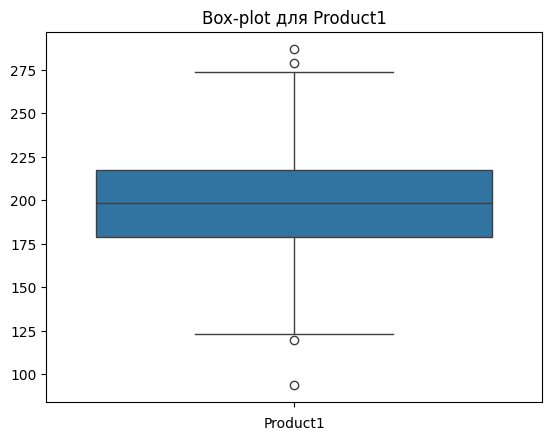

In [10]:
sns.boxplot(data=product1)
plt.title('Box-plot для Product1')
plt.xlabel('Product1')
plt.show()

In [11]:
# Определение нижнего и верхнего пределов
lower_bound_product1 = Q1_product1 - 1.5 * IQR_product1
upper_bound_product1 = Q3_product1 + 1.5 * IQR_product1

print(f"Первый квартиль (Q1): {Q1_product1}")
print(f"Третий квартиль (Q3): {Q3_product1}")
print(f"Межквартильный размах (IQR): {IQR_product1}")
print(f"Нижняя граница: {lower_bound_product1}")
print(f"Верхняя граница: {upper_bound_product1}")

Первый квартиль (Q1): 179.0
Третий квартиль (Q3): 217.25
Межквартильный размах (IQR): 38.25
Нижняя граница: 121.625
Верхняя граница: 274.625




> Выбросы начинаются при значения меньше 121.625 и больше 274.625



## **Задача 7**

<br>
Нарисуйте QQ plot выручки для обоих продуктов<br>
Какое из распределений является нормальным?

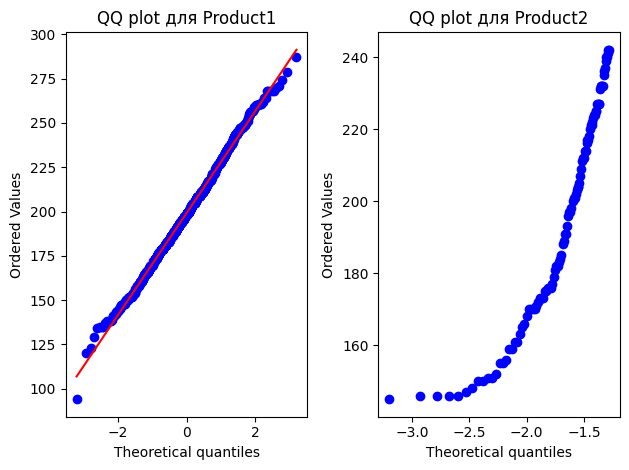

In [12]:
# Построение QQ plot для product1
plt.subplot(1, 2, 1)
stats.probplot(product1, dist="norm", plot=plt)
plt.title('QQ plot для Product1')

# Построение QQ plot для product2
plt.subplot(1, 2, 2)
stats.probplot(product2, dist="norm", plot=plt)
plt.title('QQ plot для Product2')

plt.tight_layout()
plt.show()

> Распределение выручки для product1 является нормальным, а для product2 — не нормальным.

Каких значений много или наоборот не достает в продукте2 чтобы значения стали нормально распределенными?

> На графике product2 точки в левом конце графика сильно отклоняются от референсной линии влево, что значит, много низких значений (или недостаток).



##**Задача 8**

И так мы знаем что выручка продукта1 является нормально распредленной, переведите все значения в стандартное нормальное распределение используя текущие mean и std<br>
создайте новую переменнуя и запишите новые значения туда

In [13]:
# Вычисление среднего значения (mean) и стандартного отклонения (std)
mean_product1 = statistics.mean(product1)
std_dev_product1 = statistics.stdev(product1)

# Перевод значений в стандартное нормальное распределение
standardized_product1 = []
for x in product1:
    standardized_value = (x - mean_product1) / std_dev_product1
    standardized_product1.append(standardized_value)

# Вывод новых значений
print(f"Среднее значение (mean) для product1: {mean_product1}")
print(f"Стандартное отклонение (std) для product1: {std_dev_product1}")
print(f"Значения в стандартном нормальном распределении для product1: {standardized_product1}")

Среднее значение (mean) для product1: 199.103
Стандартное отклонение (std) для product1: 28.808372278095014
Значения в стандартном нормальном распределении для product1: [-0.1077117433101013, 0.6559551444830738, -0.038287480783449034, 0.8295158007997044, -1.1837878124732115, -0.5936815809966672, 2.0097282637527933, 0.5171066194297692, -0.07299961204677517, 1.8014554761728363, -0.1771360058367536, -0.038287480783449034, 0.13527317553318166, 1.9055918699628147, -0.3854087934167104, 1.0725007196429874, 0.725379407009726, -2.4334245379529524, -0.6283937122599934, 2.1485767888060976, 1.3154856384862703, -0.1077117433101013, 0.4129702256397908, -0.281272399626732, 2.3915617076493807, -1.8433183064764083, -0.5936815809966672, 1.1072128509063135, -0.1077117433101013, 0.6906672757463999, 0.4476823569031169, 0.5518187506930954, 0.6559551444830738, 1.489046294802901, 0.8989400633263567, 2.3915617076493807, 0.20469743805983395, -0.7325301060499718, 0.5518187506930954, 0.968364325853009, -0.6978179

Нарисуйте kdeplot нового стандартного распределения

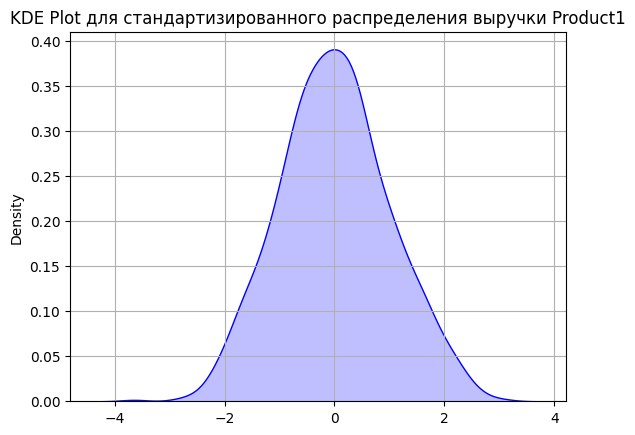

In [14]:
sns.kdeplot(standardized_product1, fill=True, color='blue')
plt.title('KDE Plot для стандартизированного распределения выручки Product1')
plt.grid(True)
plt.show()

## **Задача 9**

<br>
Подсчитайте точку слева от которой будет 1% всей вероятности распределения

In [15]:
# Нахождение 1-го процентиля в стандартном нормальном распределении
percentile_value = stats.norm.ppf(0.01)

print(f"Значение слева, от которого будет 1% всей вероятности: {percentile_value}")

Значение слева, от которого будет 1% всей вероятности: -2.3263478740408408


Первое значение в списке product1 равно 94. Когда мы преобразуем список в стандартное нормальное распределение, 94 преобразуется в -3.65<br>
Что нам говорит это число, особенно при сравнении с точкой которую мы только что подсчитали?



> Число -3.65 в стандартизированном нормальном распределении говорит о том, насколько далеко значение 94 отклоняется от среднего значения (mean) в единицах стандартного отклонения (std)

> Значение -3.65 говорит, что 94 отклоняется от среднего намного больше, чем 99% значений (т.е., это значение можно считать выбросом или крайне редким случаем).



## **Задача 10**

<br>
Продукт2 новый, но уже достаточно стабилизирвался за эти месяцы. Мы хотим знать сколько он будет в среднем нам приносить ежедневно выручки и в будущем.<br>
Дайте точечную оценку средней выручке продукта2

In [16]:
# Удаление пропущенных значений из product2
clean_product2 = []
for x in product2:
    if not np.isnan(x):
        clean_product2.append(x)

# Средняя выручка
mean_product2 = statistics.mean(clean_product2)

# Результат
print(f"Точечная оценка средней выручки для Product2: {mean_product2}")

Точечная оценка средней выручки для Product2: 193.5


Подсчитайте 95% доверительный интервал

In [17]:
# Размер выборки
n = len(clean_product2)

# Ошибка средней выборки (standard error)
se_product2 = std_dev_product2 / np.sqrt(n)

# Значение для 95% доверительного интервала
value = stats.norm.ppf(0.975)

# Вычисление доверительного интервала
ci_lower = mean_product2 - value * se_product2
ci_upper = mean_product2 + value * se_product2

# Вывод результатов
print(f"Средняя выручка для Product2: {mean_product2}")
print(f"95% доверительный интервал: ({ci_lower}, {ci_upper})")

Средняя выручка для Product2: 193.5
95% доверительный интервал: (187.6714429838974, 199.3285570161026)


## **Задача11**

<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 выше чем 197.5

In [18]:
# Средняя выручка для product1
mean_product1 = statistics.mean(product1)

# Стандартное отклонение для product1
std_dev_product1 = statistics.stdev(product1)

# Размер выборки
n_product1 = len(product1)

# Значение для проверки гипотезы
mean_hypothesis = 197.5

# Вычисление t-статистики
t_statistic = (mean_product1 - mean_hypothesis) / (std_dev_product1 / np.sqrt(n_product1))

# Значение t для уровня значимости 5%
t_critical = stats.t.ppf(1 - 0.05, df=n_product1 - 1)

print(f"Средняя выручка для product1: {mean_product1:.2f}")
print(f"Стандартное отклонение для product1: {std_dev_product1:.2f}")
print(f"t-статистика: {t_statistic:.2f}")
print(f"t-критическое значение: {t_critical:.2f}")

# Проверка гипотезы
if t_statistic > t_critical:
    print("Нулевая гипотеза отвергнута. Средняя выручка product1 выше 197.5.")
else:
    print("Нулевая гипотеза не отвергнута. Нет достаточных доказательств, что средняя выручка product1 выше 197.5.")

Средняя выручка для product1: 199.10
Стандартное отклонение для product1: 28.81
t-статистика: 1.76
t-критическое значение: 1.65
Нулевая гипотеза отвергнута. Средняя выручка product1 выше 197.5.


Какой это был типа АБ теста?



> Этот тест был односторонним t-тестом (one-tailed t-test). В одностороннем t-тесте проверил гипотезу в одном направлении. в данном случае, является ли средняя выручка product1 выше 197.5.

> Поскольку t-статистика (1.76) больше t-критического значения (1.65), нулевая гипотеза была отвергнута, и следует вывод, что средняя выручка product1 выше 197.5.



## **Задача12**

<br>
Проведите АБ тест с уровнем значимости 5% что средняя выручка у продукта1 и у продукта2 равны

In [19]:
# Средня арифметическая (mean)
mean_product1 = statistics.mean(product1)
mean_product2 = statistics.mean(clean_product2)

In [20]:
# Стандартное отклонение
std_dev_product1 = statistics.stdev(product1)
std_dev_product2 = statistics.stdev(clean_product2)

In [21]:
# Размеры выборок
n_product1 = len(product1)
n_product2 = len(clean_product2)

In [22]:
# Вычисление t-статистики
t_statistic, p_value = stats.ttest_ind(product1, clean_product2)

In [23]:
# Значение t для уровня значимости 5% (двухсторонний тест)
t_critical = stats.t.ppf(1 - 0.025, df=min(n_product1, n_product2) - 1)

In [24]:
print(f"Средняя выручка для product1: {mean_product1}")
print(f"Стандартное отклонение для product1: {std_dev_product1}")
print(f"Средняя выручка для product2: {mean_product2}")
print(f"Стандартное отклонение для product2: {std_dev_product2}")
print(f"t-статистика: {t_statistic}")
print(f"p-значение: {p_value}")
print(f"t-критическое значение: {t_critical}")

Средняя выручка для product1: 199.103
Стандартное отклонение для product1: 28.808372278095014
Средняя выручка для product2: 193.5
Стандартное отклонение для product2: 29.738082240681482
t-статистика: 1.8489503287555282
p-значение: 0.06473365137046305
t-критическое значение: 1.9842169515086827


In [25]:
# Проверка гипотезы
if abs(t_statistic) > t_critical:
    print("Нулевая гипотеза отвергнута. Средние выручки продуктов 1 и 2 различаются.")
else:
    print("Нулевая гипотеза не отвергнута. Нет достаточных доказательств, что средние выручки продуктов 1 и 2 различаются.")

Нулевая гипотеза не отвергнута. Нет достаточных доказательств, что средние выручки продуктов 1 и 2 различаются.
